#노션 리뷰 크롤링
- 사이트 : techview
- URL : https://www.techview.best/software/191

In [7]:
import requests
import pandas as pd

# Function to fetch reviews from the API
def fetch_reviews(base_url, total_pages):
    all_reviews = []

    for page in range(1, total_pages + 1):
        print(f"Fetching page {page}...")
        response = requests.get(f"{base_url}&page={page}")
        if response.status_code == 200:
            data = response.json()
            if data.get("success"):
                items = data["data"]["items"]
                for item in items:
                    review = {
                        "Review ID": item["id"],
                        "User Name": item["userInfo"]["name"],
                        "User Email": item["userInfo"]["email"],
                        "Company Name": item["basicInfo"]["companyName"],
                        "Industry": item["basicInfo"]["industry"],
                        "Job": item["basicInfo"]["job"],
                        "Software Name": item["softwareName"],
                        "Rating": item["rating"],
                        "Comment": item["comment"],
                        "Pros": item["pros"],
                        "Cons": item.get("cons", None),
                        "Category": item["categoryInfo"]["categoryTitle"],
                        "Subcategory": item["categoryInfo"]["subCategoryTitle"]
                    }

                    # Extract answer details
                    for answer in item["answers"]:
                        feature = answer["feature"]
                        score = answer["score"]
                        review[feature] = score

                    all_reviews.append(review)
        else:
            print(f"Failed to fetch page {page}, Status Code: {response.status_code}")

    return all_reviews

# Base URL and total pages to fetch
base_url = "https://api.reviewinsight.co.kr/api/software/191/reviews?id=191&limit=10"
total_pages = 6

# Fetch data and create a DataFrame
reviews_data = fetch_reviews(base_url, total_pages)
df = pd.DataFrame(reviews_data)

# Save to a CSV file
df.to_csv("reviews_data.csv", index=False, encoding="utf-8-sig")

# Display the DataFrame
print(df)


Fetching page 1...
Fetching page 2...
Fetching page 3...
Fetching page 4...
Fetching page 5...
Fetching page 6...
    Review ID   User Name                 User Email Company Name  \
0        4969     소프트웨이브2    kajib45625@jonespal.com           유원   
1        4963     소프트웨이브2    kajib45625@jonespal.com           개인   
2        4962     소프트웨이브1     xebal48456@kindomd.com          비투엔   
3        4943     소프트웨이브1     xebal48456@kindomd.com     인디비정보시스템   
4        4936     소프트웨이브1     xebal48456@kindomd.com           개인   
5        4932     소프트웨이브1     xebal48456@kindomd.com           유풍   
6        4747         구우주     honepij935@barakal.com          가천대   
7        1507     유머러스한늑대  6r4ar7ts4g@mailinator.com         None   
8        4488        캐모마일     merafi3470@hisotyr.com       Abbott   
9        1481       탐나는황새  p4n6r1wzwv@mailinator.com          웨이브   
10       4235          김용   superheroradyd@gmail.com         오라운드   
11       4034  Mihwa Shin      mh.shin8514@gmail.com      

In [5]:
df

,Review ID,User Name,User Email,Company Name,Industry,Job,Software Name,Rating,Comment,Pros,Cons,Category,Subcategory,기능 만족도,사용 난이도,고객지원 서비스,타제품과 연동성,보안 기능
0,4969,소프트웨이브2,kajib45625@jonespal.com,유원,INDUSTRY_CODE_E,JOB_CODE_A,노션,8.0,문서를 한번에 할수 있어서 편하고 능률 향상,실시간을 줄일수 있어요,메신저 활용,협업도구,공유문서형,8.6,8.6,7.1,8.6,7.1
1,4963,소프트웨이브2,kajib45625@jonespal.com,개인,INDUSTRY_CODE_I,JOB_CODE_8,노션,7.0,"계획을 세울 때 좋은 앱이긴한데, 처음 사용하는 사람한테는 조금 어렵다.","개인으로도 사용이 가능하고, 공유도 할 수 있고, pc나 모바일에서 사용할 수 있어...",사용법을 좀 쉽게 알려주는 영상이 있으면 좋겠다.,협업도구,공유문서형,8.6,7.1,8.6,8.6,10.0
2,4943,소프트웨이브1,xebal48456@kindomd.com,인디비정보시스템,INDUSTRY_CODE_I,JOB_CODE_8,노션,10.0,웹 기반이라 어디서든 쓰기 좋아요,"웹 작성도 가능하고 포트폴리오, db 기반도 되어서 편해요",양이 많아지면 속도가 늦어짐,협업도구,공유문서형,8.6,8.6,10.0,7.1,4.3
3,4936,소프트웨이브1,xebal48456@kindomd.com,개인,INDUSTRY_CODE_Q,JOB_CODE_9,노션,7.0,배운내용을 정리하는데 있어서 쉽고 간편해서 좋아요,목차들로 내용을 정리해서 목차에 어떤 내용이있는지 그걸 확인할수도 있고 메인페이지를...,다만 처음쓰는 사람들은 아무래도 어떻게 사용하는지 모르니까 그앱이 좋다는사실도 잘 ...,협업도구,공유문서형,8.6,2.9,8.6,8.6,5.7
4,4932,소프트웨이브1,xebal48456@kindomd.com,유풍,INDUSTRY_CODE_3,JOB_CODE_8,노션,7.0,헙업 솔루션 중 최고의 솔루션,다양한 템플릿을 통한 협업 가능,SAAS 솔루션이다 보니 속도 저하 현상이 간혹 발생함,협업도구,공유문서형,8.6,8.6,8.6,8.6,8.6
5,4747,구우주,honepij935@barakal.com,가천대,INDUSTRY_CODE_P,JOB_CODE_1,노션,6.0,새로운 기능들이 유용한데 완성도에서 약간의 아쉬움이 남습니다.\n,노션의 신규 업데이트는 정말 유용한 기능들을 많이 추가해줬어요. 특히 데이터베이스 ...,몇몇 업데이트된 기능들이 아직 안정적이지 않거나 기존 틀과 함께 사용할 때 틀이 어...,협업도구,공유문서형,5.7,7.1,4.3,7.1,8.6
6,1507,유머러스한늑대,6r4ar7ts4g@mailinator.com,None,INDUSTRY_CODE_J,JOB_CODE_7,노션,7.8,노션에 등록된 폼으로 일정 및 진행상황 관리기 실시간으로 되니 업무 효율이 증가한것...,"협업툴에서 가장 중요한건 일정관리나 진행상황이라고 생각하는데, 일정관리나 진행상황을...",노션은 문서기능이 주 능력이기 때문에 메신저 기능은 타 협업툴보다 개발이 필요하다고...,협업도구,공유문서형,9.0,7.0,8.0,7.0,8.0
7,4488,캐모마일,merafi3470@hisotyr.com,Abbott,INDUSTRY_CODE_9,JOB_CODE_9,노션,10.0,노션은 다재다능한 도구로 프로젝트 관리와 정보 공유를 한 곳에서 할 수 있고 커스텀...,"노션은 프로젝트 관리, 조직 내 정보 공유, 개인을 위한 다재다능한 도구 이다. 특...",개선 의견을 생각해보면 자세한 설명과 틈새 기능 정보가 포함된 보다 심도 있는 템플...,협업도구,공유문서형,10.0,10.0,10.0,8.6,8.6
8,1481,탐나는황새,p4n6r1wzwv@mailinator.com,웨이브,INDUSTRY_CODE_I,JOB_CODE_8,노션,8.5,노션은 탬플릿과 편한 슬래시 작업 방식으로 누구나 쉽게 작업할 수 있습니다.,기본적인 탬플릿이 제작되어있고 단순히 가져와 데이터만 변경시키면 누구나 쉽게 작업을...,노션에는 따로 채팅기능이 없기에 카카오톡을 사용하여 팀프로젝트를 진행했어요,협업도구,공유문서형,9.0,10.0,9.0,7.0,9.0
9,4235,김용,superheroradyd@gmail.com,오라운드,INDUSTRY_CODE_N,JOB_CODE_1,노션,10.0,"노션은 팀 협업을 향상시키는 플랫폼으로, 실시간 공유, 검색 및 필터링 기능, 맞춤...",노션은 사용하는 사람에 따라 천차만별의 성능을 보여줍니다. 많이 알수록 다양한 형...,None,협업도구,공유문서형,10.0,10.0,10.0,10.0,10.0


###박스플롯으로 데이터 확인

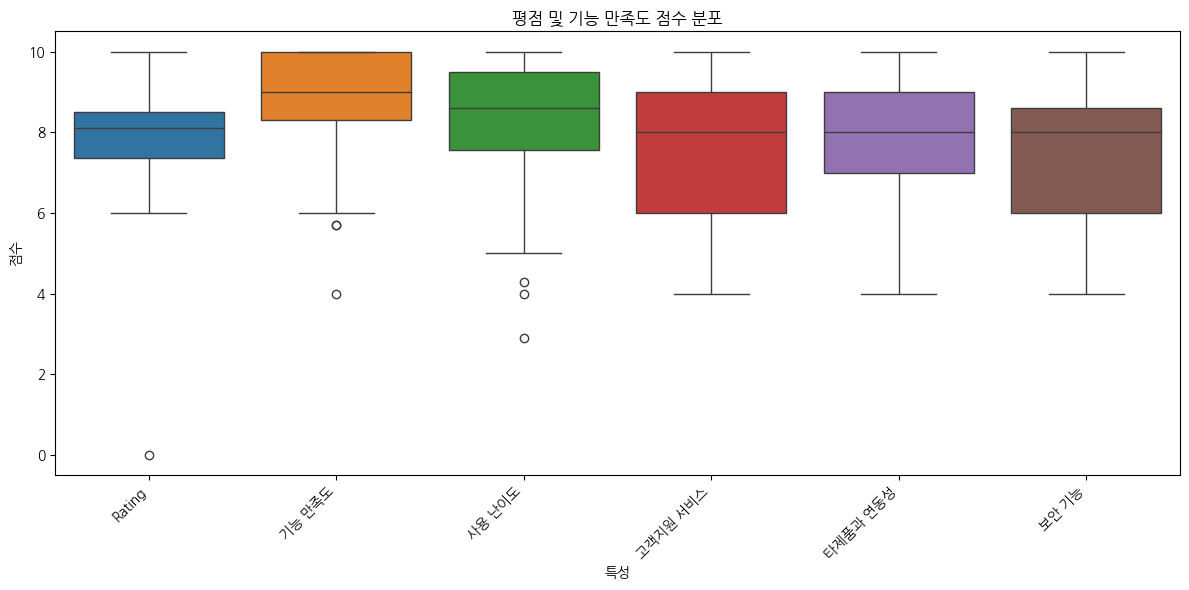

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# Select columns for boxplot
rating_columns = ['Rating', '기능 만족도', '사용 난이도', '고객지원 서비스', '타제품과 연동성', '보안 기능']

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[rating_columns])
plt.title('평점 및 기능 만족도 점수 분포')
plt.xlabel('특성')
plt.ylabel('점수')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.tight_layout()
plt.show()


Rating 이상치 제거

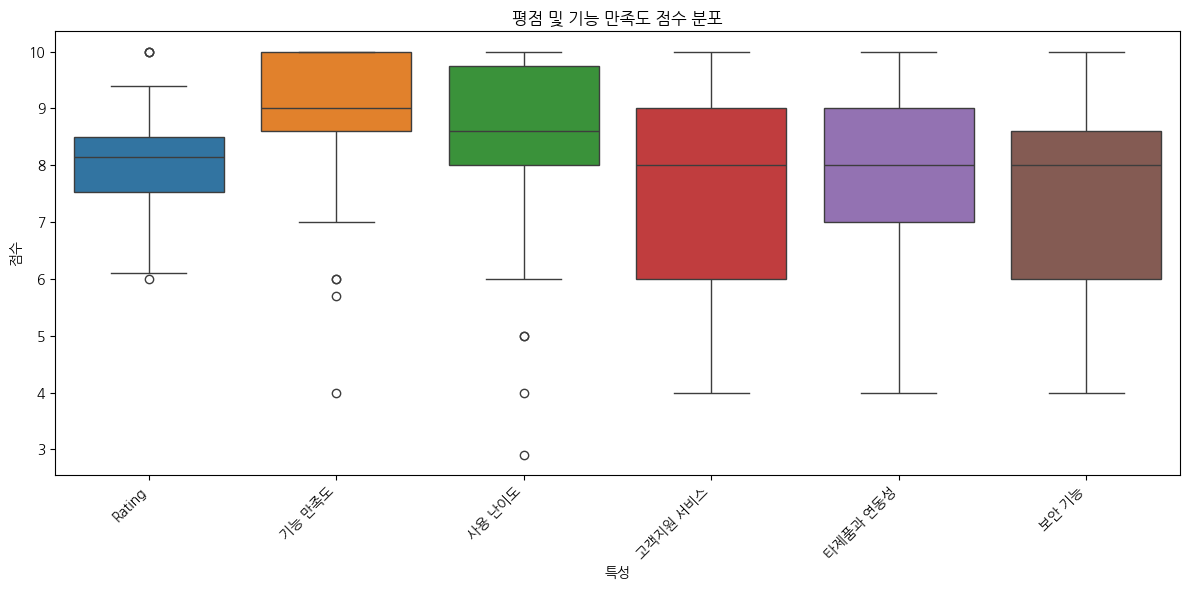

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# Filter out rows where Rating is 0
df = df[df['Rating'] != 0]

# Select columns for boxplot
rating_columns = ['Rating', '기능 만족도', '사용 난이도', '고객지원 서비스', '타제품과 연동성', '보안 기능']

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[rating_columns])
plt.title('평점 및 기능 만족도 점수 분포')
plt.xlabel('특성')
plt.ylabel('점수')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.tight_layout()
plt.show()
